1) Data exploration
   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://you

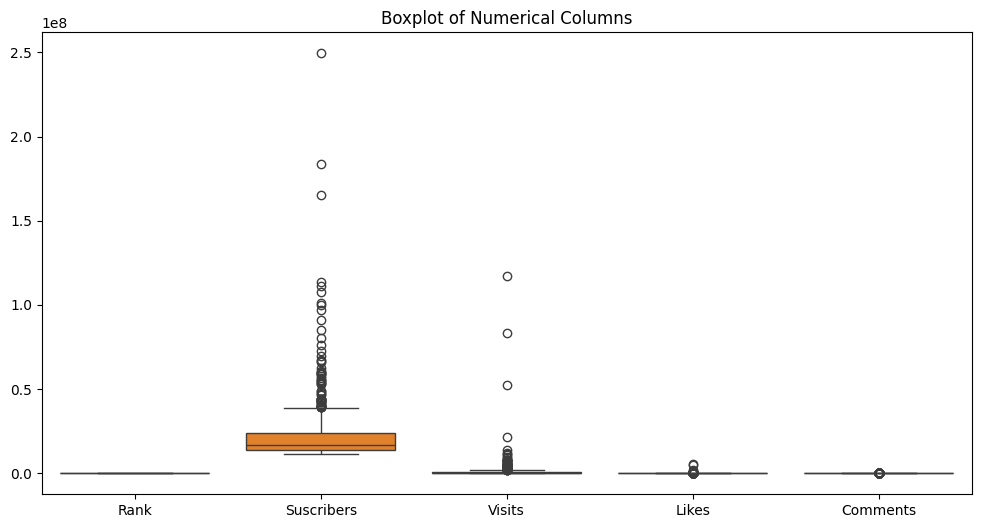

Missing values after handling:
Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64


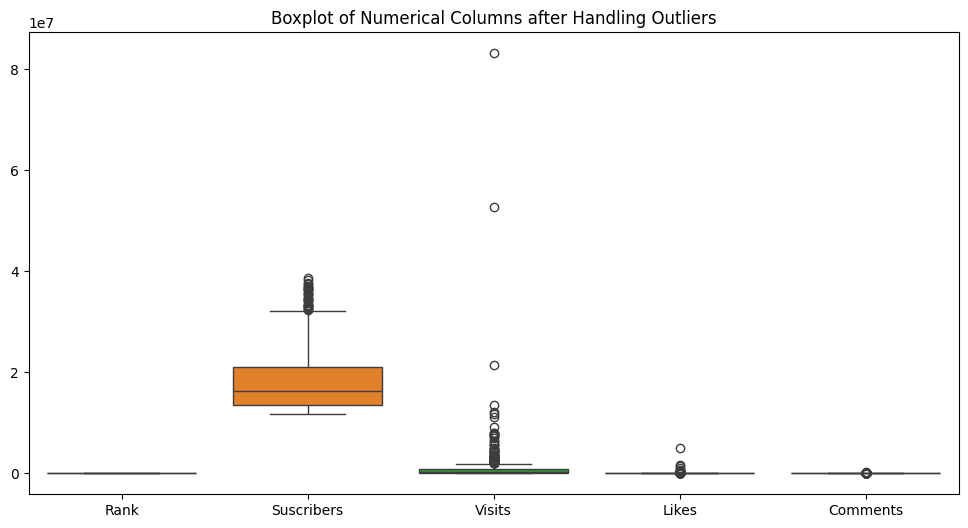

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("1) Data exploration")
df = pd.read_csv('youtubers_df.csv')
print(df.head())
print(df.info())
print(df.describe())
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {df[column].unique()}")
print("Missing values in the dataset:")
print(df.isnull().sum())
df = df.dropna()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot of Numerical Columns")
plt.show()
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
df = remove_outliers('Suscribers')
print("Missing values after handling:")
print(df.isnull().sum())
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot of Numerical Columns after Handling Outliers")
plt.show()



Trend Analysis


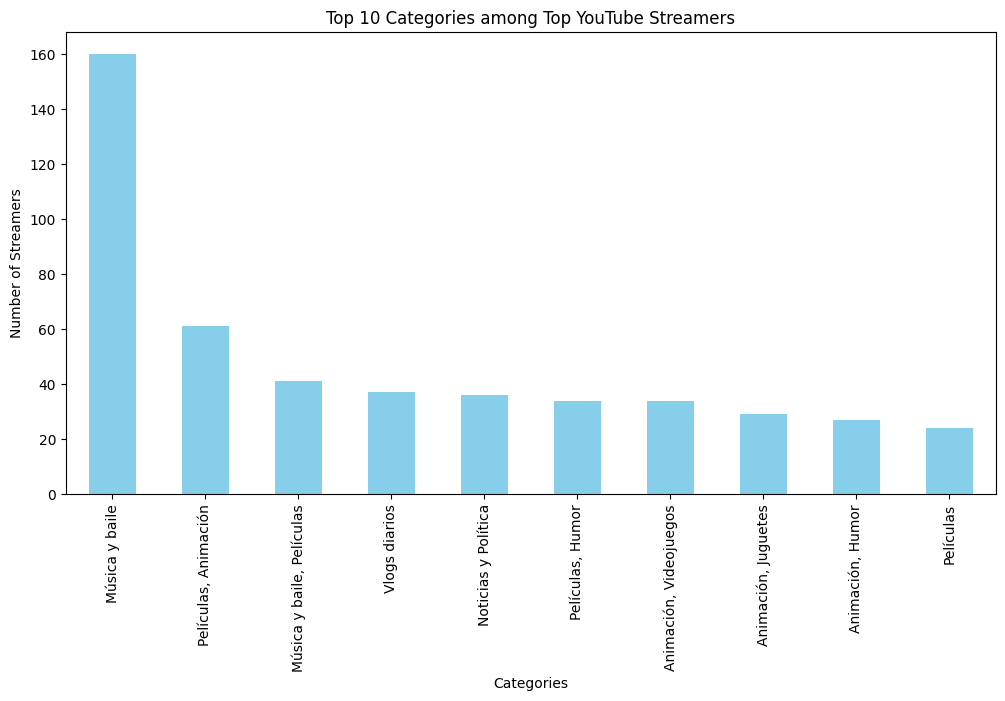

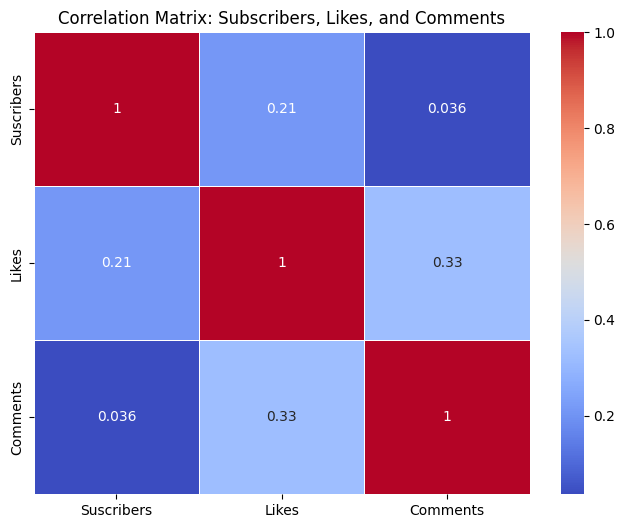

In [9]:
import pandas as pd
print("Trend Analysis")
df = pd.read_csv('youtubers_df.csv')
category_counts = df['Categories'].value_counts()

top_categories = category_counts.head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories among Top YouTube Streamers')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.show()
correlation_matrix = df[['Suscribers', 'Likes', 'Comments']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix: Subscribers, Likes, and Comments')
plt.show()

Audience Analysis


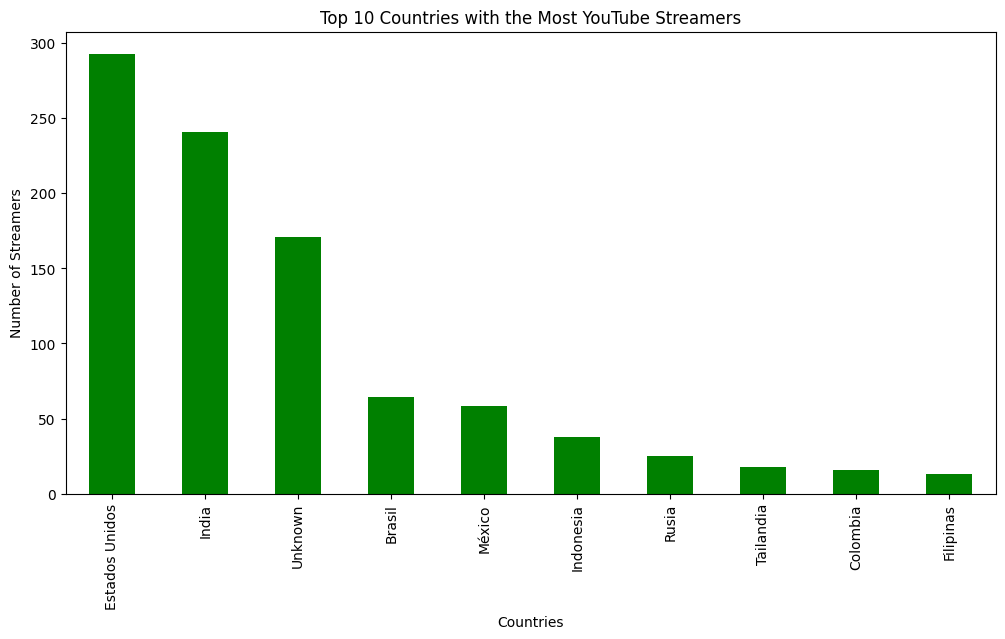

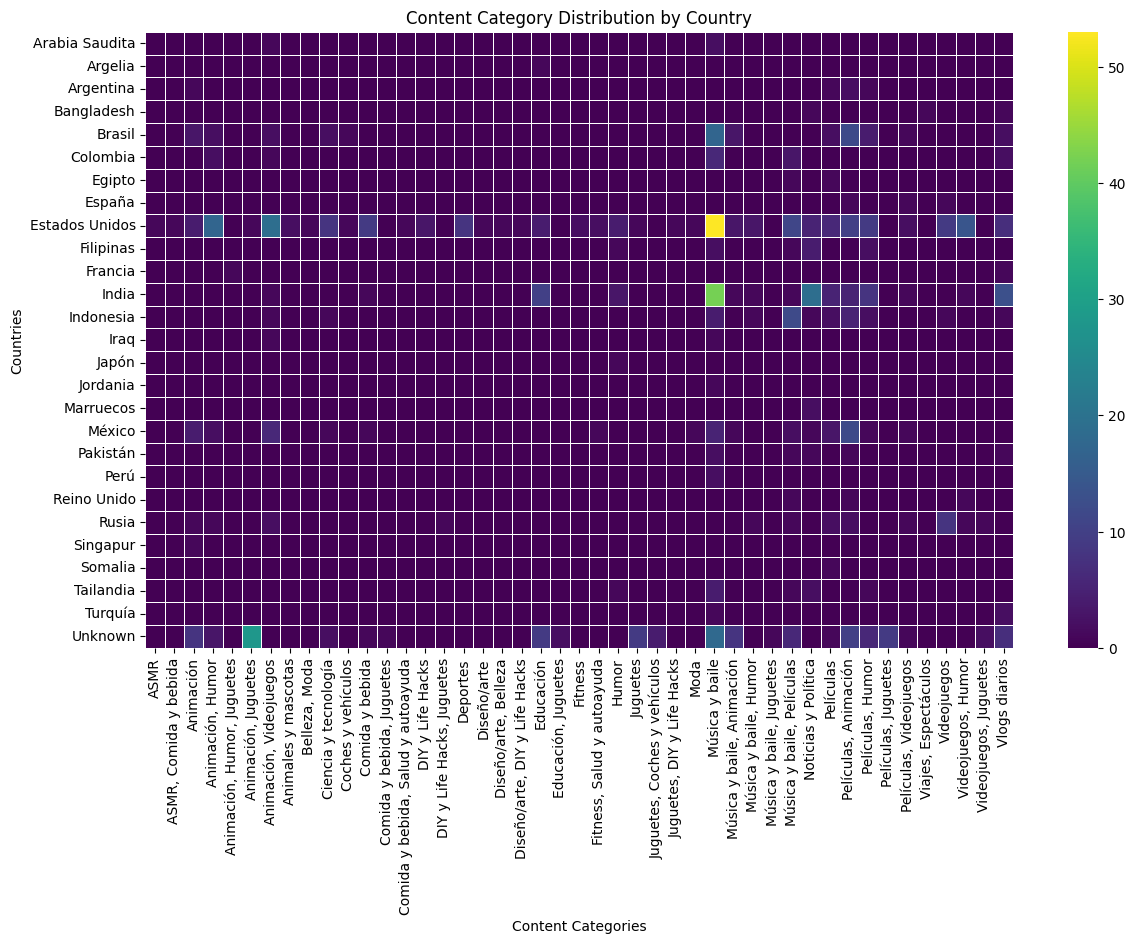

In [11]:
import pandas as pd
print("Audience Analysis")
df = pd.read_csv('youtubers_df.csv')
country_counts = df['Country'].value_counts()
top_countries = country_counts.head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Most YouTube Streamers')
plt.xlabel('Countries')
plt.ylabel('Number of Streamers')
plt.show()
category_by_country = pd.crosstab(df['Country'], df['Categories'])
plt.figure(figsize=(14, 8))
sns.heatmap(category_by_country, cmap='viridis', linewidths=.5)
plt.title('Content Category Distribution by Country')
plt.xlabel('Content Categories')
plt.ylabel('Countries')
plt.show()

Performance Analysis


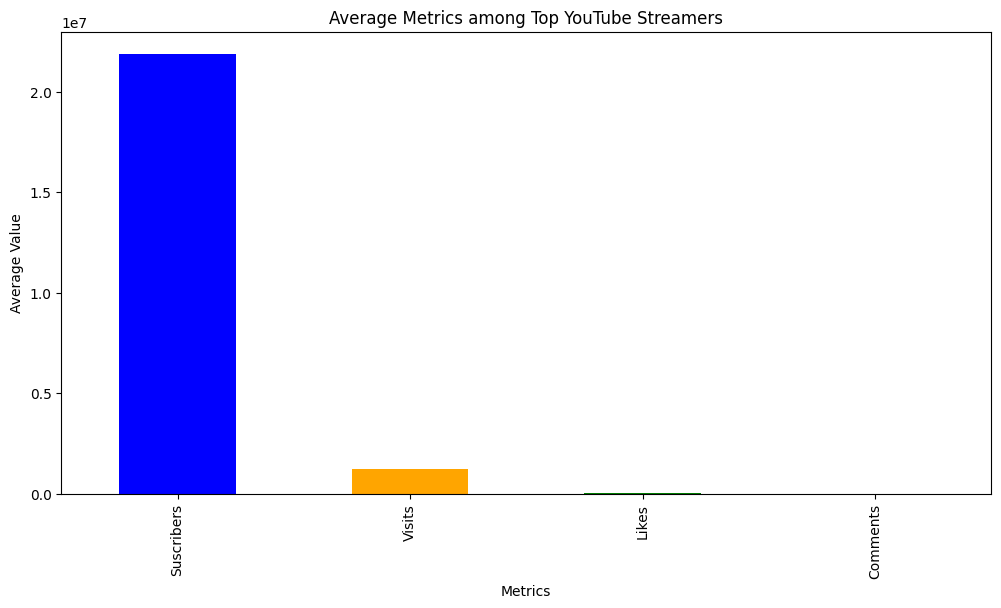

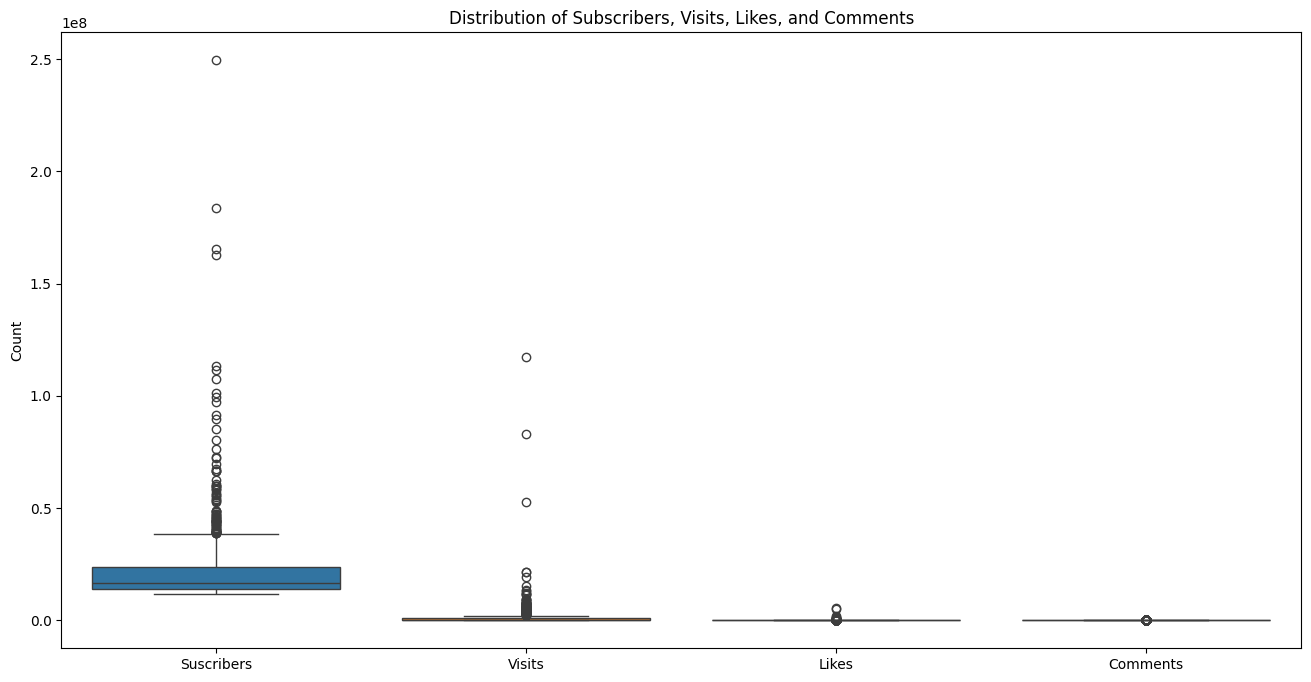

In [13]:
import pandas as pd
print("Performance Analysis")
df = pd.read_csv('youtubers_df.csv')
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
plt.figure(figsize=(12, 6))
average_metrics.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Average Metrics among Top YouTube Streamers')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[['Suscribers', 'Visits', 'Likes', 'Comments']])
plt.title('Distribution of Subscribers, Visits, Likes, and Comments')
plt.ylabel('Count')
plt.show()

Content Categories


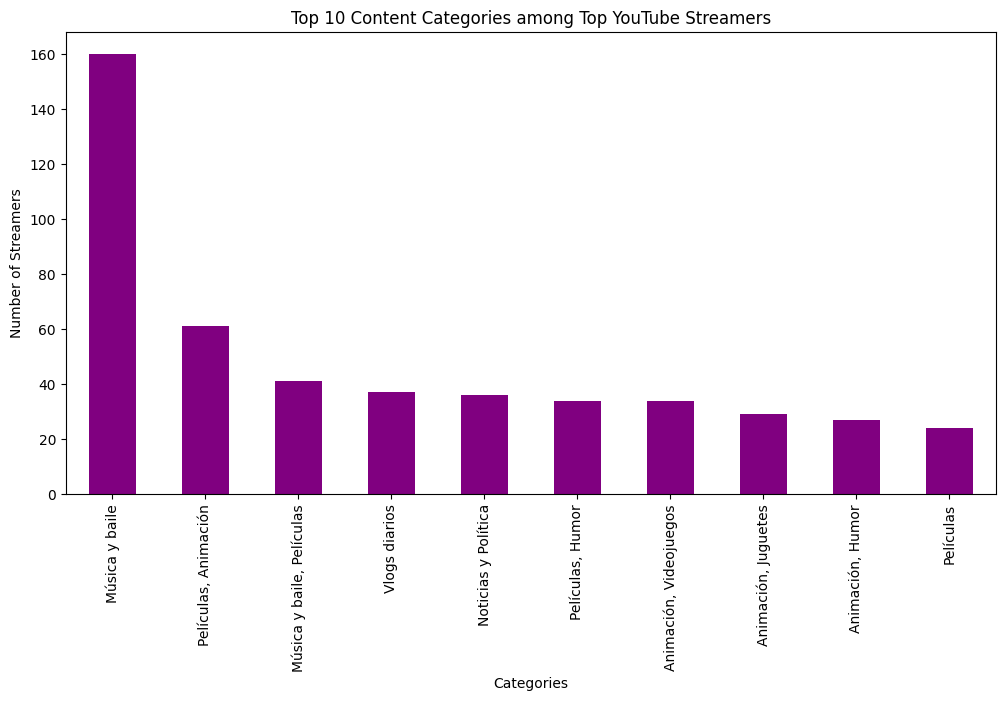

<Figure size 1400x800 with 0 Axes>

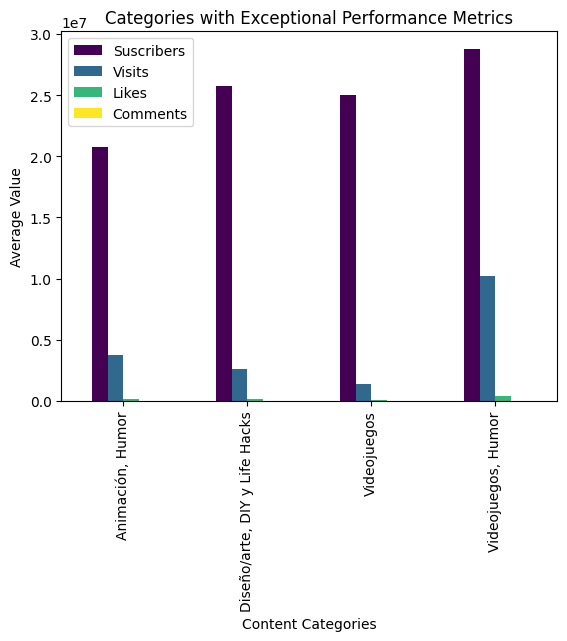

In [14]:
import pandas as pd
print("Content Categories")
df = pd.read_csv('youtubers_df.csv')
category_counts = df['Categories'].value_counts()

top_categories = category_counts.head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='purple')
plt.title('Top 10 Content Categories among Top YouTube Streamers')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.show()

average_metrics_by_category = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()


exceptional_categories = average_metrics_by_category[
    (average_metrics_by_category['Suscribers'] > average_metrics_by_category['Suscribers'].mean()) &
    (average_metrics_by_category['Visits'] > average_metrics_by_category['Visits'].mean()) &
    (average_metrics_by_category['Likes'] > average_metrics_by_category['Likes'].mean()) &
    (average_metrics_by_category['Comments'] > average_metrics_by_category['Comments'].mean())
]


plt.figure(figsize=(14, 8))
exceptional_categories.plot(kind='bar', colormap='viridis')
plt.title('Categories with Exceptional Performance Metrics')
plt.xlabel('Content Categories')
plt.ylabel('Average Value')
plt.show()

Brands and Collaborations


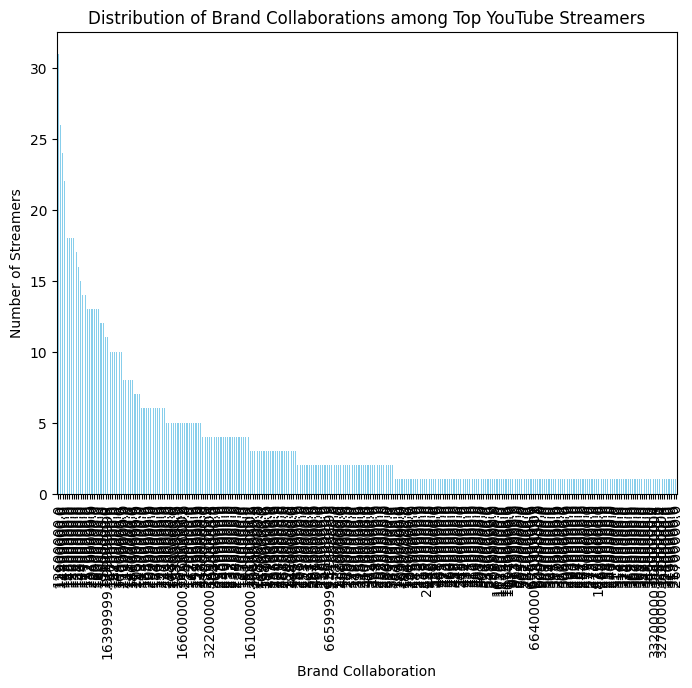

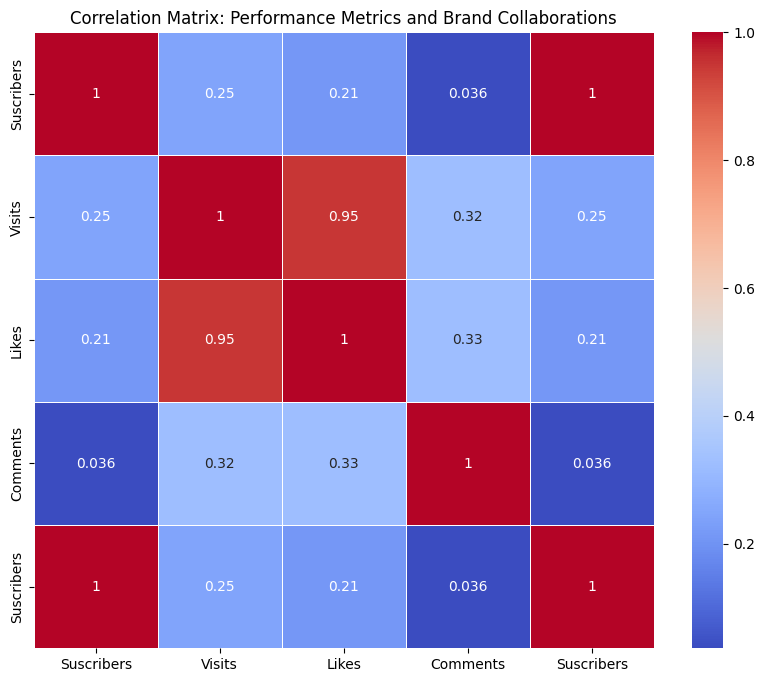

In [25]:
import pandas as pd
print("Brands and Collaborations")
df = pd.read_csv('youtubers_df.csv')
brand_collaboration_counts = df['Suscribers'].value_counts()


plt.figure(figsize=(8, 6))
brand_collaboration_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Brand Collaborations among Top YouTube Streamers')
plt.xlabel('Brand Collaboration')
plt.ylabel('Number of Streamers')
plt.show()

correlation_with_brand = df[['Suscribers', 'Visits', 'Likes', 'Comments', 'Suscribers']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_brand, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix: Performance Metrics and Brand Collaborations')
plt.show()

In [57]:
import pandas as pd
print("Content Recommendation")
df = pd.read_csv('youtubers_df.csv')

df = df.dropna()

df['Engagements'] = df['Likes'] + df['Comments'] + df['Visits']

df['Engagement Rate'] = df['Engagements'] / df['Suscribers']

df = df.sort_values(by='Engagement Rate', ascending=False)
print(df.head(100))

Content Recommendation
     Rank           Username              Categories  Suscribers  \
136   137           MrBeast2           Vlogs diarios  31300000.0   
153   154          DaFuqBoom        Animación, Humor  29800000.0   
488   489  BeastPhilanthropy         Comida y bebida  16900000.0   
958   959            dojacat          Música y baile  11900000.0   
805   806            NickPro                Deportes  13200000.0   
..    ...                ...                     ...         ...   
701   702     ComePlayWithMe     Películas, Juguetes  14200000.0   
759   760          lunomosik             Videojuegos  13600000.0   
694   695          Jazzghost  Animación, Videojuegos  14200000.0   
673   674         TommyInnit      Videojuegos, Humor  14600000.0   
912   913         FilmTheory    Películas, Animación  12400000.0   

            Country      Visits      Likes  Comments  \
136  Estados Unidos  83100000.0  5000000.0   11600.0   
153  Estados Unidos  52700000.0  1700000.0   828